<a href="https://colab.research.google.com/github/devanshu100/Automating-aws-with-python/blob/master/Fraud_Analysis_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED =42
labels = ["Normal","Fraud"]

In [ ]:
from google.colab import files
uploaded=files.upload() 

Saving Purchase_Fraud_Data (1).csv to Purchase_Fraud_Data (1) (1).csv


In [ ]:
df = pd.read_csv("Purchase_Fraud_Data (1).csv")

In [ ]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0.0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0.0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1.0,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0.0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0.0,home_essentials,25-8-1970


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97156 entries, 0 to 97155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         97156 non-null  int64  
 1   signup_time     97156 non-null  object 
 2   purchase_time   97156 non-null  object 
 3   purchase_value  97156 non-null  int64  
 4   device_id       97156 non-null  object 
 5   source          97156 non-null  object 
 6   browser         97156 non-null  object 
 7   sex             93974 non-null  object 
 8   ip_address      97156 non-null  float64
 9   class           97155 non-null  float64
 10  category        97155 non-null  object 
 11  dob             93999 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 8.9+ MB


Exploratory Data Analysis

In [ ]:
df.isnull().values.any()

True

NameError: ignored

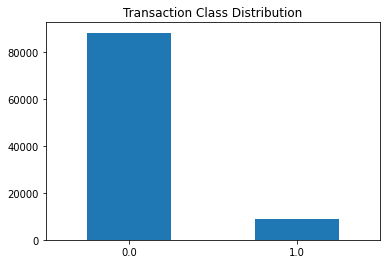

In [ ]:
count_classes = pd.value_counts(df['class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("class")

plt.ylabel("Frequency")

In [ ]:
fraud = df[df['class']==1]
normal= df[df['class']==0]


In [ ]:
print(fraud.shape,normal.shape)

(9055, 12) (88100, 12)


In [ ]:
fraud.purchase_value.describe()

count      9055.000000
mean      50504.017118
std       28601.568293
min        1062.000000
25%       25768.500000
50%       50602.000000
75%       75435.500000
max      100037.000000
Name: purchase_value, dtype: float64

In [ ]:
normal.purchase_value.describe()

count     88100.000000
mean      50492.631135
std       28561.335486
min        1032.000000
25%       25877.000000
50%       50387.000000
75%       75322.000000
max      100092.000000
Name: purchase_value, dtype: float64

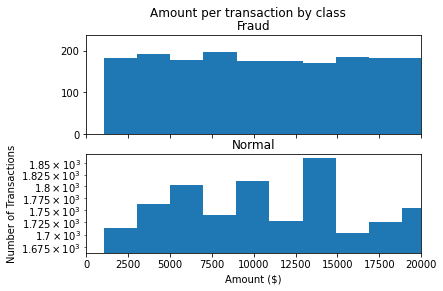

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.purchase_value, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.purchase_value, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97156 entries, 0 to 97155
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         97156 non-null  int64  
 1   signup_time     97156 non-null  object 
 2   purchase_time   97156 non-null  object 
 3   purchase_value  97156 non-null  int64  
 4   device_id       97156 non-null  object 
 5   source          97156 non-null  object 
 6   browser         97156 non-null  object 
 7   sex             93974 non-null  object 
 8   ip_address      97156 non-null  float64
 9   class           97155 non-null  float64
 10  category        97155 non-null  object 
 11  dob             93999 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 8.9+ MB


In [ ]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0.0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0.0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1.0,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0.0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0.0,home_essentials,25-8-1970


In [ ]:
import datetime

time = "purchase_time"
date_time = datetime.datetime.strptime(time, "%H:%M:%S")
a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

print(seconds)

ValueError: ignored

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.purchase_value)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.purchase_value)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('purchase_value')
plt.show()